In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
# creating the dataframe

In [28]:
candidates = {'gmat': [780,750,690,710,780,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,760,640,620,660,660,680,650,670,580,590,790],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'age': [25,28,24,27,26,31,24,25,28,23,25,27,30,28,26,23,29,31,26,26,25,24,28,23,25,29,28,26,30,30,23,24,27,29,28,22,23,24,28,31],
              'admitted': [2,2,1,2,2,2,0,2,2,0,0,2,2,1,2,0,0,1,0,0,1,0,0,0,0,1,1,0,1,2,0,0,1,1,1,0,0,0,0,2]
              }

df = pd.DataFrame(candidates, columns = ['gmat', 'gpa', 'work_experience', 'age', 'admitted'])
print (df)

    gmat  gpa  work_experience  age  admitted
0    780  4.0                3   25         2
1    750  3.9                4   28         2
2    690  3.3                3   24         1
3    710  3.7                5   27         2
4    780  3.9                4   26         2
5    730  3.7                6   31         2
6    690  2.3                1   24         0
7    720  3.3                4   25         2
8    740  3.3                5   28         2
9    690  1.7                1   23         0
10   610  2.7                3   25         0
11   690  3.7                5   27         2
12   710  3.7                6   30         2
13   680  3.3                4   28         1
14   770  3.3                3   26         2
15   610  3.0                1   23         0
16   580  2.7                4   29         0
17   650  3.7                6   31         1
18   540  2.7                2   26         0
19   590  2.3                3   26         0
20   620  3.3                2   2

In [29]:
# applying the random forest in python

X = df[['gmat', 'gpa', 'work_experience', 'age']]
y = df['admitted']


In [30]:
print ('Features: \n \n', X)

print ('\n \n Target: \n \n', y)

Features: 
 
     gmat  gpa  work_experience  age
0    780  4.0                3   25
1    750  3.9                4   28
2    690  3.3                3   24
3    710  3.7                5   27
4    780  3.9                4   26
5    730  3.7                6   31
6    690  2.3                1   24
7    720  3.3                4   25
8    740  3.3                5   28
9    690  1.7                1   23
10   610  2.7                3   25
11   690  3.7                5   27
12   710  3.7                6   30
13   680  3.3                4   28
14   770  3.3                3   26
15   610  3.0                1   23
16   580  2.7                4   29
17   650  3.7                6   31
18   540  2.7                2   26
19   590  2.3                3   26
20   620  3.3                2   25
21   600  2.0                1   24
22   550  2.3                4   28
23   550  2.7                1   23
24   570  3.0                2   25
25   670  3.3                6   29
26   660  3.7 

In [31]:
# splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
#applying random forest classifier

clf = RandomForestClassifier(n_estimators=100) # n_estimators = number of trees in the random forest
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Acutal'>

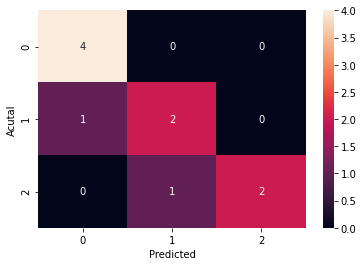

In [33]:
# verifying the accuracy via confusion matrix

conf_mat = pd.crosstab(y_test, y_pred, rownames =['Acutal'], colnames = ["Predicted"])
sns.heatmap(conf_mat, annot = True)

In [45]:
# getting accuracy of the model

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)*100, '%')

Accuracy:  80.0 %


In [49]:
#tkinter GUI
import tkinter as tk

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 350)
canvas1.pack()

#for GMAT
label1 = tk.Label(root, text = '       GMAT:')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry(root)
canvas1.create_window(270, 100, window = entry1)

#for GPA
label2 = tk.Label(root, text = 'GPA:    ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry(root)
canvas1.create_window(270, 120, window=entry2)

#work_experience
label3 = tk.Label(root, text = 'Work Experience:')
canvas1.create_window(140, 140, window=label3)

entry3 = tk.Entry(root)
canvas1.create_window(270, 140, window=entry3)

#Age input
label4 = tk.Label(root, text = 'Age:   ')
canvas1.create_window(160, 160, window=label4)

entry4 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry4)

def values():
    global gmat
    gmat = float(entry1.get())
    
    global gpa
    gpa = float(entry2.get())
    
    global work_experience
    work_experience = float(entry3.get())
    
    global age
    age = float(entry4.get())
    
    
    if clf.predict([[gmat, gpa, work_experience, age]]) ==2:
        result = 'Admitted'
        
    if clf.predict([[gmat, gpa, work_experience, age]]) ==0:
        result = 'Not Admitted'
        
    if clf.predict([[gmat, gpa, work_experience, age]]) ==1:
        result = 'In Waiting List'
        
    Prediction_result = (' Predicted Result: ', result)
    label_Prediction = tk.Label(root, text = Prediction_result, bg = 'sky blue')
    
    canvas1.create_window(270, 280, window = label_Prediction)
    
    
button1 = tk.Button(root, text = '   Predict   ', command = values, bg = 'green', fg = 'white', font = 11)
canvas1.create_window(270, 220, window=button1)

root.mainloop()
    
    
    